# New York City Taxi Trip Duration

In this competition, Kaggle is challenging you to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

The evaluation metric for this competition is Root Mean Squared Logarithmic Error.

The RMSLE is calculated as


Where:

ϵ is the RMSLE value (score)<br>
n is the total number of observations in the (public/private) data set,<br>
pi is your prediction of trip duration, and<br>
ai is the actual trip duration for i.<br>
log(x) is the natural logarithm of x<br>

Submission File<br>

For every row in the dataset, submission files should contain two columns: id and trip_duration.  The id corresponds to the column of that id in the test.csv. The file should contain a header and have the following format:

|id |trip_duration|
|:-:|:-:|
|id00001|978|
|id00002|978|
|id00003|978|
|id00004|978|


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import plotly.offline as py_offline
import plotly.plotly as py
import plotly.graph_objs as go

py_offline.init_notebook_mode(connected=True)

In [2]:
#load all the data and display

df = pd.read_csv('train.csv')

print(df.head())
print(df.shape)

          id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731

## visualization

In [9]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Base on the number above, the data has been preprocessed, because there is no null entry

In [17]:
#which vendor is the most popular
vendor = df.vendor_id.value_counts()

num_vendor = pd.Series(vendor).values
print(vendor)
print(num_vendor)

2    780302
1    678342
Name: vendor_id, dtype: int64
[780302 678342]


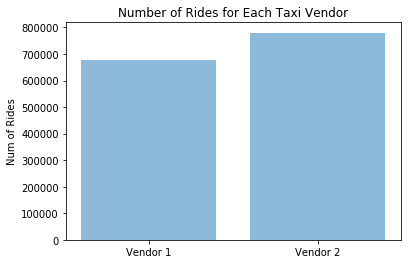

In [20]:
objects = ('Vendor 1', 'Vendor 2')
y_pos = np.arange(len(objects))

num_vendor = num_vendor[::-1]
 
plt.bar(y_pos, num_vendor, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Num of Rides')
plt.title('Number of Rides for Each Taxi Vendor')
 
plt.show()

In [3]:
# %%time
# test = df.take(np.random.permutation(len(df))[:2000])



# X_pick = df['pickup_longitude'].iloc[0:1500]
# y_pick = df['pickup_latitude'].iloc[0:1500]



# X_drop = df['dropoff_longitude'].iloc[0:1500]
# y_drop = df['dropoff_latitude'].iloc[0:1500]

# trace = go.Scattergeo(locationmode = 'USA-states',
#         lon = X_pick,
#         lat = y_pick,
#         text = "Pick Up Location",
#         mode = 'markers',
#         marker = dict(
#             size = 8,
#             opacity = 0.8,
#             reversescale = True,
#             autocolorscale = False,
#             symbol = 'square',
#             line = dict(
#                 width=1,
#                 color='rgba(102, 102, 102)'
#             ),
       
#         )
#     )

# trace_2 = go.Scattergeo(locationmode = 'USA-states',
#         lon = X_drop,
#         lat = y_drop,
#         text = "Drop Off Location",
#         mode = 'markers',
#         marker = dict(
#             size = 8,
#             opacity = 0.8,
#             reversescale = True,
#             autocolorscale = False,
#             symbol = 'circle',
#             line = dict(
#                 width=1,
#                 color='rgba(255, 0, 0, 0.4)'
#             ),
       
#         )
#     )

# layout = dict(
#         title = 'NYC Taxi pick/drop location',
# #         colorbar = True,
#         geo = dict(
#             scope='usa',
#             projection=dict( type='albers usa' ),
# #             projection=dict( type = 'Mercator' ),
#             showland = True,
#             landcolor = "rgb(250, 250, 250)",
#             subunitcolor = "rgb(217, 217, 217)",
#             countrycolor = "rgb(217, 217, 217)",
#             countrywidth = 0.5,
#             subunitwidth = 0.5,
            
#             lonaxis = dict( range= [ -74.05, -73] ),
#             lataxis = dict( range= [40.5, 41] ),
            
#             center = dict(lon= -73.980415, lat =40.763939)
            
#         ),
#     )

# fig = dict( data=[trace, trace_2], layout=layout )
# py_offline.iplot(fig, validate=False,)

# fig = plt.figure()
# ax1 = fig.add_subplot(111)

# ax1.scatter(X_pick, y_pick, c='b', marker="s", label='Pick up location')
# ax1.scatter(X_drop,y_drop, c='r', marker="o", label='Drop off location')
# plt.legend(loc='upper left');
# plt.show()


In [4]:
y = df['trip_duration']
X = df.drop(['id', 'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',], axis=1)
# print  the number of occurance

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [5]:
#error function: RMLSE
from sklearn.metrics import mean_squared_error
def calculate_error(y_test, y_pred):

    log_test = np.log(y_test+1)
    log_pred = np.log(y_pred+1)
    RMSE = np.sqrt(mean_squared_error(log_test, log_pred))
    
    return RMSE


In [7]:
from sklearn.ensemble import RandomForestRegressor as RFR

result_table = pd.DataFrame(columns =['num_est', 
                                      'max_depth', 
                                      'min_samples', 
                                      'error'])

num_iterations = 15

for i in range (num_iterations):
    num_est = np.random.randint(10, 50)
    max_depth = np.random.randint(5, 20)
    min_samples_split = np.random.randint(2,50)
    regr = RFR(n_estimators = num_est,
          max_depth = max_depth,
          min_samples_split = min_samples_split,
          verbose = 2,
          random_state = 2)

    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    
    rmlse = calculate_error(y_pred, y_test)
    
    row = pd.DataFrame([[num_est, 
                             max_depth, 
                             min_samples_split,
                        rmlse]],
                         columns =['num_est', 
                                      'max_depth', 
                                      'min_samples', 
                                      'error'])
                            
    
    result_table = result_table.append(row, ignore_index= True)

building tree 1 of 47


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


building tree 2 of 47
building tree 3 of 47
building tree 4 of 47
building tree 5 of 47
building tree 6 of 47
building tree 7 of 47
building tree 8 of 47
building tree 9 of 47
building tree 10 of 47
building tree 11 of 47
building tree 12 of 47
building tree 13 of 47
building tree 14 of 47
building tree 15 of 47
building tree 16 of 47
building tree 17 of 47
building tree 18 of 47
building tree 19 of 47
building tree 20 of 47
building tree 21 of 47
building tree 22 of 47
building tree 23 of 47
building tree 24 of 47
building tree 25 of 47
building tree 26 of 47
building tree 27 of 47
building tree 28 of 47
building tree 29 of 47
building tree 30 of 47
building tree 31 of 47
building tree 32 of 47
building tree 33 of 47
building tree 34 of 47
building tree 35 of 47
building tree 36 of 47
building tree 37 of 47
building tree 38 of 47
building tree 39 of 47
building tree 40 of 47
building tree 41 of 47
building tree 42 of 47
building tree 43 of 47
building tree 44 of 47
building tree 45 of

[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:  4.4min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    2.3s finished


building tree 1 of 27


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s


building tree 2 of 27
building tree 3 of 27
building tree 4 of 27
building tree 5 of 27
building tree 6 of 27
building tree 7 of 27
building tree 8 of 27
building tree 9 of 27
building tree 10 of 27
building tree 11 of 27
building tree 12 of 27
building tree 13 of 27
building tree 14 of 27
building tree 15 of 27
building tree 16 of 27
building tree 17 of 27
building tree 18 of 27
building tree 19 of 27
building tree 20 of 27
building tree 21 of 27
building tree 22 of 27
building tree 23 of 27
building tree 24 of 27
building tree 25 of 27
building tree 26 of 27
building tree 27 of 27


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    1.8s finished


building tree 1 of 48


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s


building tree 2 of 48
building tree 3 of 48
building tree 4 of 48
building tree 5 of 48
building tree 6 of 48
building tree 7 of 48
building tree 8 of 48
building tree 9 of 48
building tree 10 of 48
building tree 11 of 48
building tree 12 of 48
building tree 13 of 48
building tree 14 of 48
building tree 15 of 48
building tree 16 of 48
building tree 17 of 48
building tree 18 of 48
building tree 19 of 48
building tree 20 of 48
building tree 21 of 48
building tree 22 of 48
building tree 23 of 48
building tree 24 of 48
building tree 25 of 48
building tree 26 of 48
building tree 27 of 48
building tree 28 of 48
building tree 29 of 48
building tree 30 of 48
building tree 31 of 48
building tree 32 of 48
building tree 33 of 48
building tree 34 of 48
building tree 35 of 48
building tree 36 of 48
building tree 37 of 48
building tree 38 of 48
building tree 39 of 48
building tree 40 of 48
building tree 41 of 48
building tree 42 of 48
building tree 43 of 48
building tree 44 of 48
building tree 45 of

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  4.0min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    2.1s finished


building tree 1 of 48


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s


building tree 2 of 48
building tree 3 of 48
building tree 4 of 48
building tree 5 of 48
building tree 6 of 48
building tree 7 of 48
building tree 8 of 48
building tree 9 of 48
building tree 10 of 48
building tree 11 of 48
building tree 12 of 48
building tree 13 of 48
building tree 14 of 48
building tree 15 of 48
building tree 16 of 48
building tree 17 of 48
building tree 18 of 48
building tree 19 of 48
building tree 20 of 48
building tree 21 of 48
building tree 22 of 48
building tree 23 of 48
building tree 24 of 48
building tree 25 of 48
building tree 26 of 48
building tree 27 of 48
building tree 28 of 48
building tree 29 of 48
building tree 30 of 48
building tree 31 of 48
building tree 32 of 48
building tree 33 of 48
building tree 34 of 48
building tree 35 of 48
building tree 36 of 48
building tree 37 of 48
building tree 38 of 48
building tree 39 of 48
building tree 40 of 48
building tree 41 of 48
building tree 42 of 48
building tree 43 of 48
building tree 44 of 48
building tree 45 of

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  4.1min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    2.1s finished


building tree 1 of 41


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


building tree 2 of 41
building tree 3 of 41
building tree 4 of 41
building tree 5 of 41
building tree 6 of 41
building tree 7 of 41
building tree 8 of 41
building tree 9 of 41
building tree 10 of 41
building tree 11 of 41
building tree 12 of 41
building tree 13 of 41
building tree 14 of 41
building tree 15 of 41
building tree 16 of 41
building tree 17 of 41
building tree 18 of 41
building tree 19 of 41
building tree 20 of 41
building tree 21 of 41
building tree 22 of 41
building tree 23 of 41
building tree 24 of 41
building tree 25 of 41
building tree 26 of 41
building tree 27 of 41
building tree 28 of 41
building tree 29 of 41
building tree 30 of 41
building tree 31 of 41
building tree 32 of 41
building tree 33 of 41
building tree 34 of 41
building tree 35 of 41
building tree 36 of 41
building tree 37 of 41
building tree 38 of 41
building tree 39 of 41
building tree 40 of 41
building tree 41 of 41


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.9s finished


building tree 1 of 16


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


building tree 2 of 16
building tree 3 of 16
building tree 4 of 16
building tree 5 of 16
building tree 6 of 16
building tree 7 of 16
building tree 8 of 16
building tree 9 of 16
building tree 10 of 16
building tree 11 of 16
building tree 12 of 16
building tree 13 of 16
building tree 14 of 16
building tree 15 of 16
building tree 16 of 16


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.5s finished


building tree 1 of 33


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


building tree 2 of 33
building tree 3 of 33
building tree 4 of 33
building tree 5 of 33
building tree 6 of 33
building tree 7 of 33
building tree 8 of 33
building tree 9 of 33
building tree 10 of 33
building tree 11 of 33
building tree 12 of 33
building tree 13 of 33
building tree 14 of 33
building tree 15 of 33
building tree 16 of 33
building tree 17 of 33
building tree 18 of 33
building tree 19 of 33
building tree 20 of 33
building tree 21 of 33
building tree 22 of 33
building tree 23 of 33
building tree 24 of 33
building tree 25 of 33
building tree 26 of 33
building tree 27 of 33
building tree 28 of 33
building tree 29 of 33
building tree 30 of 33
building tree 31 of 33
building tree 32 of 33
building tree 33 of 33


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.8s finished


building tree 1 of 33


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


building tree 2 of 33
building tree 3 of 33
building tree 4 of 33
building tree 5 of 33
building tree 6 of 33
building tree 7 of 33
building tree 8 of 33
building tree 9 of 33
building tree 10 of 33
building tree 11 of 33
building tree 12 of 33
building tree 13 of 33
building tree 14 of 33
building tree 15 of 33
building tree 16 of 33
building tree 17 of 33
building tree 18 of 33
building tree 19 of 33
building tree 20 of 33
building tree 21 of 33
building tree 22 of 33
building tree 23 of 33
building tree 24 of 33
building tree 25 of 33
building tree 26 of 33
building tree 27 of 33
building tree 28 of 33
building tree 29 of 33
building tree 30 of 33
building tree 31 of 33
building tree 32 of 33
building tree 33 of 33


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.6s finished


building tree 1 of 23


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s finished


building tree 1 of 32


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


building tree 2 of 32
building tree 3 of 32
building tree 4 of 32
building tree 5 of 32
building tree 6 of 32
building tree 7 of 32
building tree 8 of 32
building tree 9 of 32
building tree 10 of 32
building tree 11 of 32
building tree 12 of 32
building tree 13 of 32
building tree 14 of 32
building tree 15 of 32
building tree 16 of 32
building tree 17 of 32
building tree 18 of 32
building tree 19 of 32
building tree 20 of 32
building tree 21 of 32
building tree 22 of 32
building tree 23 of 32
building tree 24 of 32
building tree 25 of 32
building tree 26 of 32
building tree 27 of 32
building tree 28 of 32
building tree 29 of 32
building tree 30 of 32
building tree 31 of 32
building tree 32 of 32


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:  2.5min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.2s finished


building tree 1 of 23


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


building tree 2 of 23
building tree 3 of 23
building tree 4 of 23
building tree 5 of 23
building tree 6 of 23
building tree 7 of 23
building tree 8 of 23
building tree 9 of 23
building tree 10 of 23
building tree 11 of 23
building tree 12 of 23
building tree 13 of 23
building tree 14 of 23
building tree 15 of 23
building tree 16 of 23
building tree 17 of 23
building tree 18 of 23
building tree 19 of 23
building tree 20 of 23
building tree 21 of 23
building tree 22 of 23
building tree 23 of 23


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.0s finished


building tree 1 of 28


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


building tree 2 of 28
building tree 3 of 28
building tree 4 of 28
building tree 5 of 28
building tree 6 of 28
building tree 7 of 28
building tree 8 of 28
building tree 9 of 28
building tree 10 of 28
building tree 11 of 28
building tree 12 of 28
building tree 13 of 28
building tree 14 of 28
building tree 15 of 28
building tree 16 of 28
building tree 17 of 28
building tree 18 of 28
building tree 19 of 28
building tree 20 of 28
building tree 21 of 28
building tree 22 of 28
building tree 23 of 28
building tree 24 of 28
building tree 25 of 28
building tree 26 of 28
building tree 27 of 28
building tree 28 of 28


[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.6s finished


building tree 1 of 16


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


building tree 2 of 16
building tree 3 of 16
building tree 4 of 16
building tree 5 of 16
building tree 6 of 16
building tree 7 of 16
building tree 8 of 16
building tree 9 of 16
building tree 10 of 16
building tree 11 of 16
building tree 12 of 16
building tree 13 of 16
building tree 14 of 16
building tree 15 of 16
building tree 16 of 16


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   49.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.3s finished


building tree 1 of 22


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s remaining:    0.0s


building tree 2 of 22
building tree 3 of 22
building tree 4 of 22
building tree 5 of 22
building tree 6 of 22
building tree 7 of 22
building tree 8 of 22
building tree 9 of 22
building tree 10 of 22
building tree 11 of 22
building tree 12 of 22
building tree 13 of 22
building tree 14 of 22
building tree 15 of 22
building tree 16 of 22
building tree 17 of 22
building tree 18 of 22
building tree 19 of 22
building tree 20 of 22
building tree 21 of 22
building tree 22 of 22


[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:  2.5min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    1.5s finished


building tree 1 of 44


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


building tree 2 of 44
building tree 3 of 44
building tree 4 of 44
building tree 5 of 44
building tree 6 of 44
building tree 7 of 44
building tree 8 of 44
building tree 9 of 44
building tree 10 of 44
building tree 11 of 44
building tree 12 of 44
building tree 13 of 44
building tree 14 of 44
building tree 15 of 44
building tree 16 of 44
building tree 17 of 44
building tree 18 of 44
building tree 19 of 44
building tree 20 of 44
building tree 21 of 44
building tree 22 of 44
building tree 23 of 44
building tree 24 of 44
building tree 25 of 44
building tree 26 of 44
building tree 27 of 44
building tree 28 of 44
building tree 29 of 44
building tree 30 of 44
building tree 31 of 44
building tree 32 of 44
building tree 33 of 44
building tree 34 of 44
building tree 35 of 44
building tree 36 of 44
building tree 37 of 44
building tree 38 of 44
building tree 39 of 44
building tree 40 of 44
building tree 41 of 44
building tree 42 of 44
building tree 43 of 44
building tree 44 of 44


[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:  3.5min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    1.6s finished


In [8]:
result_table

,num_est,max_depth,min_samples,error
0,47,11,39,0.014720
1,27,17,34,0.002454
2,48,10,19,0.026390
3,48,10,22,0.026418
4,41,6,24,0.188851
5,16,8,41,0.081159
6,33,7,41,0.134667
7,33,5,37,0.265516
8,23,7,16,0.135268
9,32,9,5,0.047485
